* Brian Blaylock*  
* January 10, 2019 *

# HRRR Terrain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_variable
from BB_cmap.landuse_colormap import LU_MODIS21
from BB_cmap.FLAME_cmap import cm_ros
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap

In [29]:
H = get_hrrr_variable(datetime.now(), 'HGT:surface')


 >> Dowloading tempfile: ./temp_hrrr_2019011012_f00_HGT.grib2
/n---------------------------------------------------------------------------
!! Hey! You are requesting a date that is not on the Pando archive yet.  !!
!! That's ok, I'll redirect you to the NOMADS server. :)                 !!
---------------------------------------------------------------------------

GRIB2 File: http://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20190110/conus/hrrr.t12z.wrfsfcf00.grib2
 .idx File: http://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20190110/conus/hrrr.t12z.wrfsfcf00.grib2.idx
 >> Matched a variable:  58:30453071:d=2019011012:HGT:surface:anl:
 >> Byte Range: 30453071 32687847
  Run Date: 2019-01-10 12:00 UTC F00
Valid Date: 2019-01-10 12:00 UTC


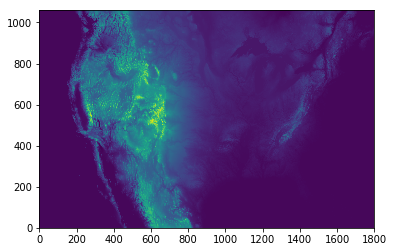

In [4]:
plt.pcolormesh(H['value'])

In [51]:
ter_lon = np.percentile(H['value'], [0,5, 25, 50, 75, 95, 100], axis=0)
mean_lon = np.mean(H['lon'], axis=0)

In [52]:
ter_lon[0]

array([-0.03599548, -0.03599548, -0.03599548, ..., -0.03599548,
       -0.03599548, -0.03599548])

Text(0.5,0,'Approximate Longitude')

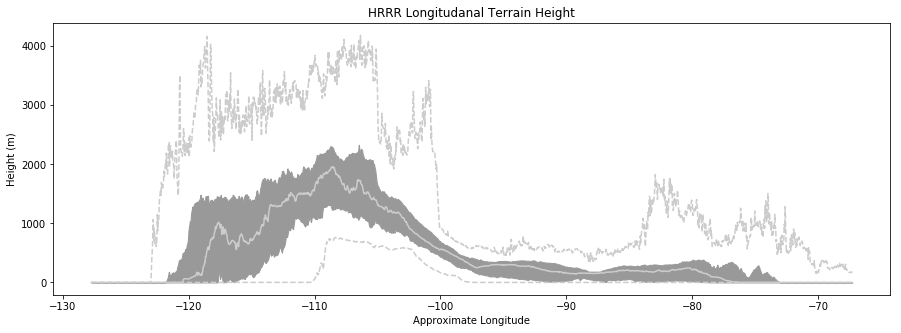

In [59]:
light_grey = [.8,.8,.8]
grey = [.6,.6,.6]

plt.figure(figsize=[15,5])

plt.fill_between(mean_lon, ter_lon[2], ter_lon[4], color=grey)
#plt.plot(mean_lon, ter_lon[0], linestyle='--', color=light_grey)
plt.plot(mean_lon, ter_lon[1], linestyle='--', color=light_grey)
plt.plot(mean_lon, ter_lon[3], color=light_grey)
#plt.plot(mean_lon, ter_lon[-2], linestyle='--', color=light_grey)
plt.plot(mean_lon, ter_lon[-1], linestyle='--', color=light_grey)

plt.title('HRRR Longitudanal Terrain Height')
plt.ylabel('Height (m)')
plt.xlabel('Approximate Longitude')